In [ ]:
! git clone https://github.com/maxstclair/DS4002

Cloning into 'DS4002'...
remote: Enumerating objects: 862, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 862 (delta 47), reused 7 (delta 7), pack-reused 709 (from 1)
Receiving objects: 100% (862/862), 9.41 MiB | 5.98 MiB/s, done.
Resolving deltas: 100% (313/313), done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
df_econ_raw = pd.read_csv('/content/DS4002/Project_2/DATA/Economic_raw.csv')
df_econ_raw.head()

,GeoFips,GeoName,2021:Q1,2021:Q2,2021:Q3,2021:Q4,2022:Q1,2022:Q2,2022:Q3,2022:Q4,2023:Q1,2023:Q2,2023:Q3,2023:Q4,2024:Q1,2024:Q2,2024:Q3
0,0,United States,21058379.0,21389005.0,21571421.0,21960388.0,21903850.0,21919222.0,22066784.0,22249459.0,22403435.0,22539418.0,22780933.0,22960600.0,23053545.0,23223906.0,23400294.0
1,1000,Alabama,231794.4,233098.1,233262.8,236751.1,236482.7,236710.5,239032.4,242000.2,242878.0,243977.0,245845.8,248717.8,248659.8,250739.6,254444.5
2,2000,Alaska,51163.7,51027.9,51471.8,52153.2,50074.2,50439.4,50687.4,51867.3,52603.5,53932.0,54828.4,54874.8,54710.6,54561.4,54857.0
3,4000,Arizona,383197.7,390550.4,398028.3,408367.1,405972.9,408465.6,410845.9,415629.4,418484.3,421015.8,423551.0,426547.3,428803.1,432050.1,435344.6
4,5000,Arkansas,134714.6,137904.2,137750.6,139485.1,138593.9,138183.9,139863.6,141601.5,142340.1,142045.3,142757.0,144299.8,146111.8,146642.3,149105.5


States to include: Minnesota, Wisconsin, Michigan, Iowa, Missouri, Indiana, Illinois, Arkansas, Louisiana, Mississippi

In [ ]:
states_to_keep = [
    "Minnesota", "Wisconsin", "Michigan", "Iowa",
    "Missouri", "Indiana", "Illinois", "Arkansas",
    "Louisiana", "Mississippi"
]
df_econ = df_econ_raw[df_econ_raw['GeoName'].isin(states_to_keep)]
df_econ.drop(['GeoFips'], axis = 1, inplace=True)
df_econ.rename(columns={'GeoName':'State'}, inplace=True)
df_econ

<ipython-input-26-22889c82997e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_econ.drop(['GeoFips'], axis = 1, inplace=True)
<ipython-input-26-22889c82997e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_econ.rename(columns={'GeoName':'State'}, inplace=True)


,State,2021:Q1,2021:Q2,2021:Q3,2021:Q4,2022:Q1,2022:Q2,2022:Q3,2022:Q4,2023:Q1,2023:Q2,2023:Q3,2023:Q4,2024:Q1,2024:Q2,2024:Q3
4,Arkansas,134714.6,137904.2,137750.6,139485.1,138593.9,138183.9,139863.6,141601.5,142340.1,142045.3,142757.0,144299.8,146111.8,146642.3,149105.5
14,Illinois,841918.7,853522.9,857513.3,870597.5,878185.4,873990.1,874761.8,879206.8,881185.1,882473.2,887438.6,891508.3,887516.3,893704.2,898035.4
15,Indiana,378535.3,384861.3,387338.0,397753.5,396828.7,399117.5,400518.7,400658.3,399620.5,401542.8,406128.4,409869.5,414791.6,417659.9,421672.5
16,Iowa,199235.9,202112.7,200810.0,202429.9,203457.7,201168.0,201678.6,200017.3,199362.5,199476.8,203532.6,205833.7,200270.8,201088.5,201097.6
19,Louisiana,233414.9,237842.3,238655.9,241443.7,235425.8,235101.1,237071.2,239818.4,243695.2,245985.9,250108.1,254672.8,253820.4,255731.1,257161.8
23,Michigan,520496.6,532043.9,531801.5,537181.4,542021.4,542785.6,543791.1,546285.3,549267.2,553855.8,556576.0,557325.7,558921.6,564681.9,568779.3
24,Minnesota,372005.0,379971.1,377796.0,382015.9,380549.4,383317.4,387831.0,387212.9,387261.6,388214.6,392755.2,395400.3,392642.1,393936.5,395901.6
25,Mississippi,115684.1,115552.5,115319.2,116144.3,116260.1,115733.6,116348.7,117886.1,118602.9,119113.6,119687.5,120789.5,120790.3,121552.2,123069.6
26,Missouri,327438.2,331937.6,331960.0,334987.6,336631.1,338585.2,340752.0,342641.5,344631.7,347267.2,349754.5,352296.3,351820.8,355229.6,358526.7
50,Wisconsin,330171.3,334118.1,333961.9,339804.7,338975.5,338789.6,340645.1,340581.3,340370.3,341579.6,346067.0,350266.1,349300.9,352941.1,356724.6


In [ ]:
df_econ.to_csv('econ_by_state.csv', index=False)

In [ ]:
numeric_cols = df_econ.select_dtypes(include='number').columns
sums = df_econ[numeric_cols].sum()
df_total_econ = pd.DataFrame([sums])
df_total_econ

,2021:Q1,2021:Q2,2021:Q3,2021:Q4,2022:Q1,2022:Q2,2022:Q3,2022:Q4,2023:Q1,2023:Q2,2023:Q3,2023:Q4,2024:Q1,2024:Q2,2024:Q3
0,3453614.6,3509866.6,3512906.4,3561843.6,3566929.0,3566772.0,3583261.8,3595909.4,3606337.1,3621554.8,3654804.9,3682262.0,3675986.6,3703167.3,3730074.6


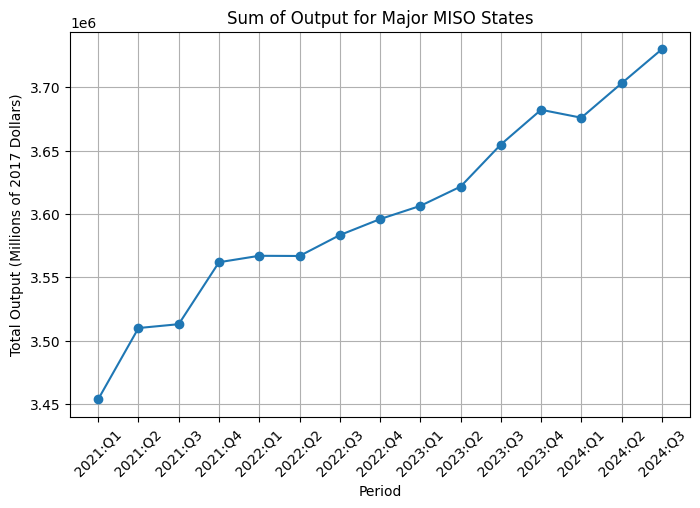

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(df_total_econ.columns,df_total_econ.iloc[0], marker='o', linestyle='-')
plt.title('Sum of Output for Major MISO States')
plt.xlabel('Period')
plt.ylabel('Total Output (Millions of 2017 Dollars)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_total_econ.to_csv('econ_total.csv', index=False)

In [ ]:
df_econ

,State,2021:Q1,2021:Q2,2021:Q3,2021:Q4,2022:Q1,2022:Q2,2022:Q3,2022:Q4,2023:Q1,2023:Q2,2023:Q3,2023:Q4,2024:Q1,2024:Q2,2024:Q3
4,Arkansas,134714.6,137904.2,137750.6,139485.1,138593.9,138183.9,139863.6,141601.5,142340.1,142045.3,142757.0,144299.8,146111.8,146642.3,149105.5
14,Illinois,841918.7,853522.9,857513.3,870597.5,878185.4,873990.1,874761.8,879206.8,881185.1,882473.2,887438.6,891508.3,887516.3,893704.2,898035.4
15,Indiana,378535.3,384861.3,387338.0,397753.5,396828.7,399117.5,400518.7,400658.3,399620.5,401542.8,406128.4,409869.5,414791.6,417659.9,421672.5
16,Iowa,199235.9,202112.7,200810.0,202429.9,203457.7,201168.0,201678.6,200017.3,199362.5,199476.8,203532.6,205833.7,200270.8,201088.5,201097.6
19,Louisiana,233414.9,237842.3,238655.9,241443.7,235425.8,235101.1,237071.2,239818.4,243695.2,245985.9,250108.1,254672.8,253820.4,255731.1,257161.8
23,Michigan,520496.6,532043.9,531801.5,537181.4,542021.4,542785.6,543791.1,546285.3,549267.2,553855.8,556576.0,557325.7,558921.6,564681.9,568779.3
24,Minnesota,372005.0,379971.1,377796.0,382015.9,380549.4,383317.4,387831.0,387212.9,387261.6,388214.6,392755.2,395400.3,392642.1,393936.5,395901.6
25,Mississippi,115684.1,115552.5,115319.2,116144.3,116260.1,115733.6,116348.7,117886.1,118602.9,119113.6,119687.5,120789.5,120790.3,121552.2,123069.6
26,Missouri,327438.2,331937.6,331960.0,334987.6,336631.1,338585.2,340752.0,342641.5,344631.7,347267.2,349754.5,352296.3,351820.8,355229.6,358526.7
50,Wisconsin,330171.3,334118.1,333961.9,339804.7,338975.5,338789.6,340645.1,340581.3,340370.3,341579.6,346067.0,350266.1,349300.9,352941.1,356724.6


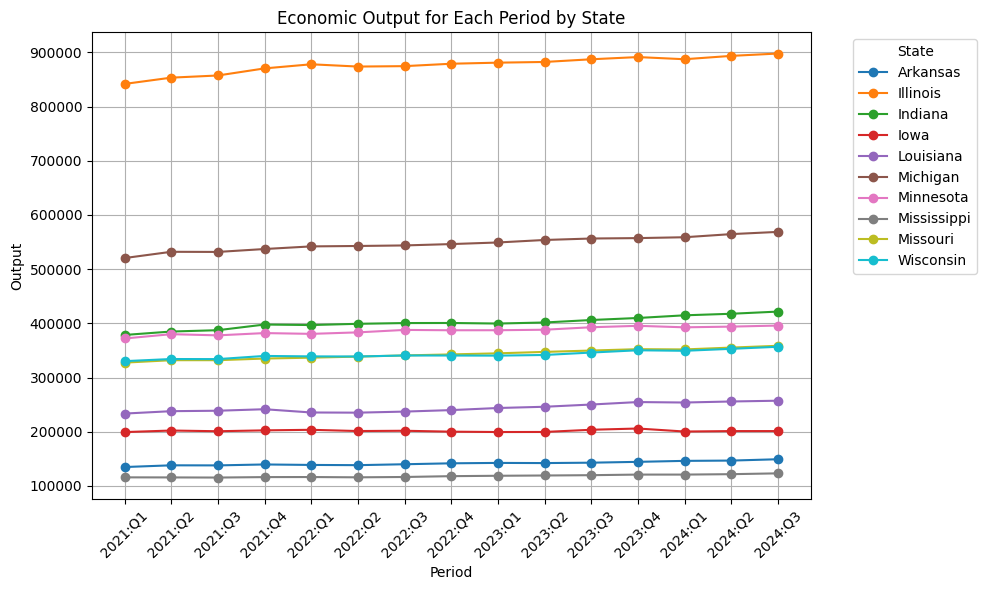

In [ ]:
df_econ.set_index(df_econ.columns[0], inplace=True)
plt.figure(figsize=(10, 6))
for state in df_econ.index:
    plt.plot(df_econ.columns, df_econ.loc[state], marker='o', label=state)
plt.title('Economic Output for Each Period by State')
plt.xlabel('Period')
plt.ylabel('Output')
plt.xticks(rotation=45)  # Rotate x-axis labels to reduce overlap
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust layout for better fit
plt.show()